In [2]:
%cd ..

/home/marmot/Boyang/MEM-Nav


In [3]:
import os
import matplotlib.pyplot as plt
import random
from poni.default import get_cfg
from poni.dataset import SemanticMapDataset, SemanticMapPrecomputedDataset

VIS_SAVE_ROOT = "visualizations/potential_functions"
os.makedirs(VIS_SAVE_ROOT, exist_ok=True)

In [8]:
cfg = get_cfg()
cfg.defrost()
cfg.DATASET.dset_name = "gibson"
cfg.DATASET.root = "data/semantic_maps/gibson/precomputed_dataset_24.0_123_spath_square"
cfg.DATASET.object_pf_cutoff_dist = 5.0
cfg.DATASET.enable_unexp_area = True
cfg.freeze()

dataset = SemanticMapPrecomputedDataset(cfg.DATASET, split="train")

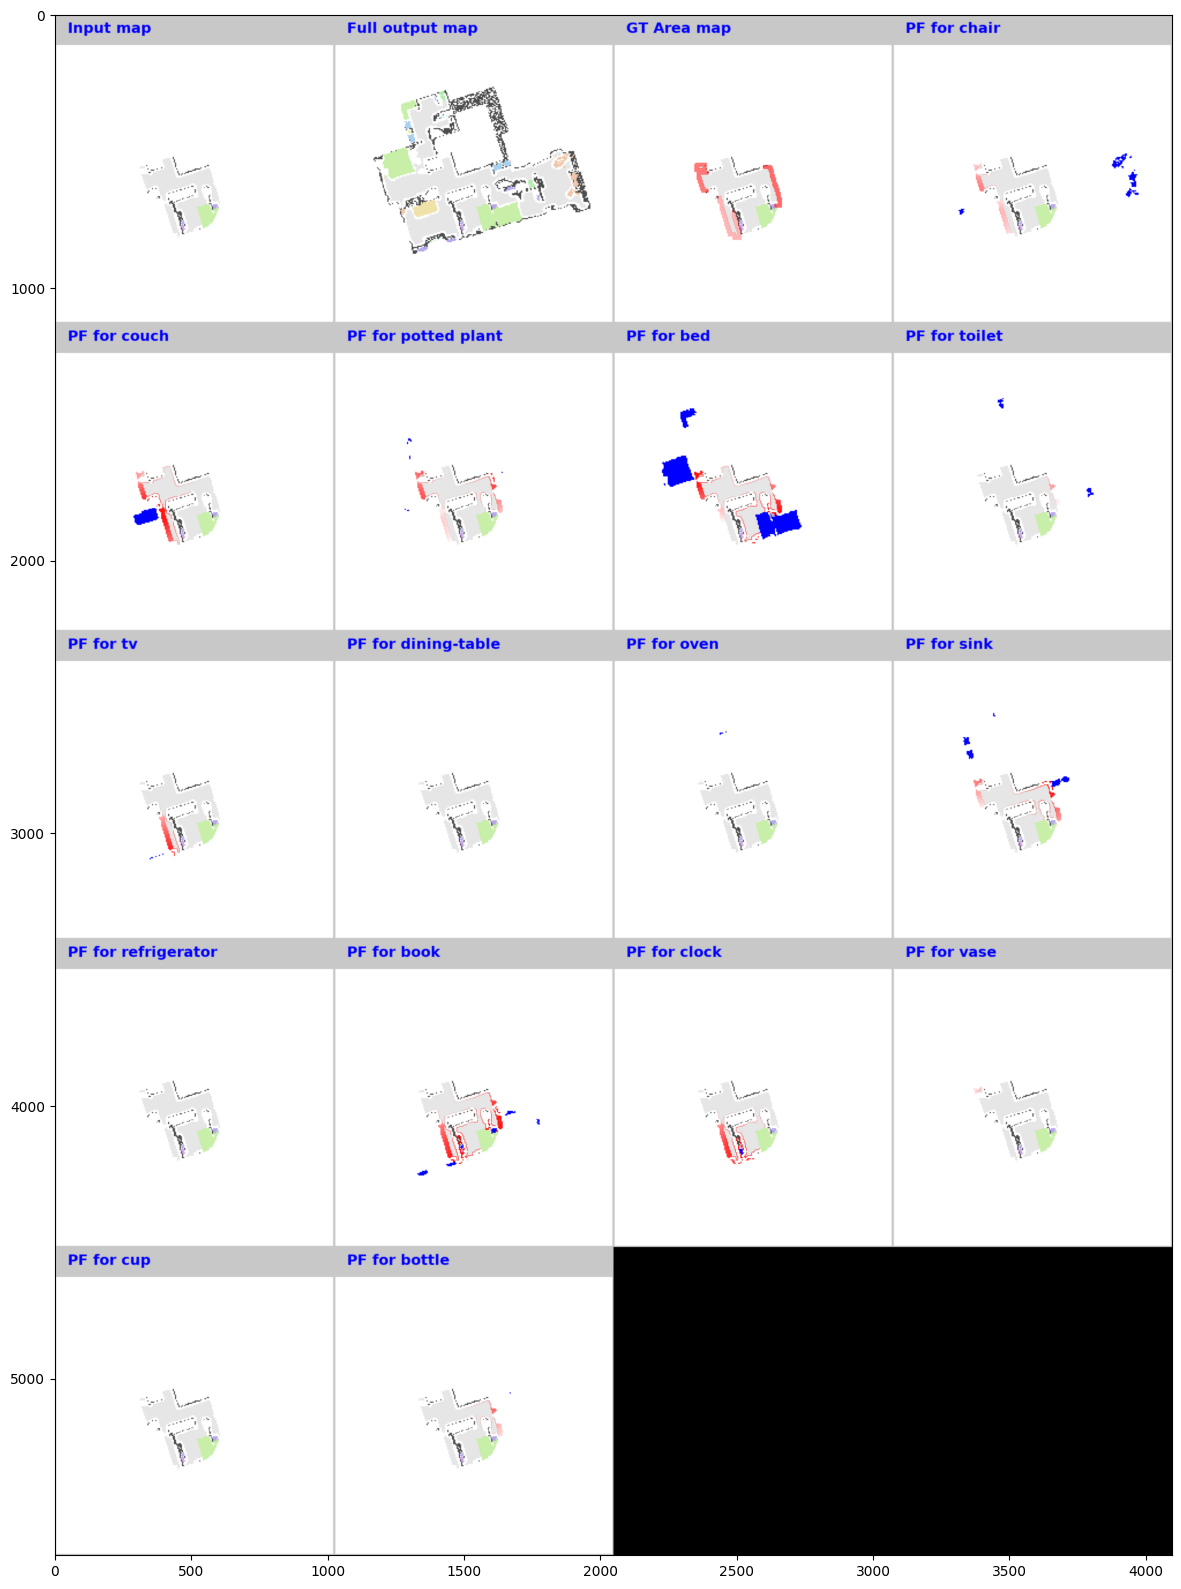

In [9]:
n_samples = len(dataset)
idx = random.randint(0, n_samples - 1)
inputs, labs = dataset[idx]

in_map = inputs['semmap'].float()
lab_map = labs['semmap'].float()
object_pfs = labs['object_pfs'].float() / 1000.0
area_pfs = labs['area_pfs'].float() / 1000.0

in_map_rgb = SemanticMapDataset.visualize_map(in_map, dataset=cfg.DATASET.dset_name)
lab_map_rgb = SemanticMapDataset.visualize_map(lab_map, dataset=cfg.DATASET.dset_name)
object_pfs_rgb = SemanticMapDataset.visualize_object_pfs(
    in_map, lab_map, object_pfs, dataset=cfg.DATASET.dset_name
)
area_pfs_rgb = SemanticMapDataset.visualize_area_pf(
    in_map, area_pfs, dset=cfg.DATASET.dset_name
)
vis_img = SemanticMapDataset.combine_image_grid(
    in_map_rgb, lab_map_rgb, object_pfs_rgb, gt_area_pfs=area_pfs_rgb,
    n_per_row=4, output_width=4096,
    dset=cfg.DATASET.dset_name
)
plt.figure(figsize=(40, 20))
plt.imshow(vis_img)